In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN

In [3]:
df = pd.read_csv('./data/clean_data_with_date_weather.csv', index_col=0)
df

,index,county,state,season,title,latitude,longitude,date,number,geohash,...,dew_point,humidity,cloud_cover,precip_type,pressure,wind_bearing,wind_speed,Class A,Class B,Class C
0,2,Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45000,-71.50000,1974-09-20,6496.0,drm5ucxrc0,...,66.227150,0.907111,0.268375,rain,1019.476257,263.869568,11.258579,1,0,0
1,5,Washita County,Oklahoma,Fall,Report 9765: Motorist and children have daylig...,35.30110,-99.17020,1973-09-28,9765.0,9y32z667yc,...,47.139355,0.646660,0.113750,No Precipitation,953.307434,164.583038,14.922651,1,0,0
2,6,Washington County,Ohio,Summer,Report 4983: Sighting and vocalizations at a h...,39.38745,-81.67339,1971-08-01,4983.0,dpjbj6r280,...,60.795803,0.745234,0.584542,No Precipitation,993.191711,17.920425,4.966946,1,0,0
3,7,Westchester County,New York,Fall,Report 31940: Fishermen and Law Enforcement Of...,41.29873,-73.73717,2010-09-01,31940.0,dr7dfn4nx3,...,63.793255,0.578789,0.126625,No Precipitation,1001.331787,270.616058,6.397976,1,0,0
4,8,Washoe County,Nevada,Fall,Report 5692: Father and son hear vocalizations...,39.59200,-119.97500,1970-09-01,5692.0,9r49jzsb5g,...,29.029099,0.402105,0.000000,No Precipitation,807.823975,219.053116,9.812248,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,5010,Harlan County,Kentucky,Fall,Report 25257: ATV riders find possible tracks ...,36.89771,-83.16293,2008-10-15,25257.0,dnscgt48er,...,54.413593,0.740113,0.151125,No Precipitation,911.663757,201.991241,5.410581,0,1,0
4035,5011,Harlan County,Kentucky,Winter,Report 38980: Teen on four-wheeler has sightin...,36.83193,-83.42429,2013-01-10,38980.0,dns9t9h391,...,47.541798,0.930158,0.878042,rain,980.778503,89.679916,6.219504,1,0,0
4036,5012,Anderson County,Kentucky,Fall,Report 1045: Father and son have a daylight en...,37.95708,-84.97527,2005-01-09,1045.0,dnexfmfuh8,...,33.796551,0.793257,0.548708,No Precipitation,995.131042,178.840332,7.880466,1,0,0
4037,5013,Anderson County,Kentucky,Fall,Report 33187: Dual sighting in late afternoon ...,37.97699,-84.90234,2011-11-15,33187.0,dng8h18000,...,56.680698,0.936365,0.963083,rain,984.935791,201.164108,13.016956,1,0,0


In [4]:
coord_df = df[['longitude', 'latitude']]
coord_df

,longitude,latitude
0,-71.50000,41.45000
1,-99.17020,35.30110
2,-81.67339,39.38745
3,-73.73717,41.29873
4,-119.97500,39.59200
...,...,...
4034,-83.16293,36.89771
4035,-83.42429,36.83193
4036,-84.97527,37.95708
4037,-84.90234,37.97699


<Axes: xlabel='longitude', ylabel='latitude'>

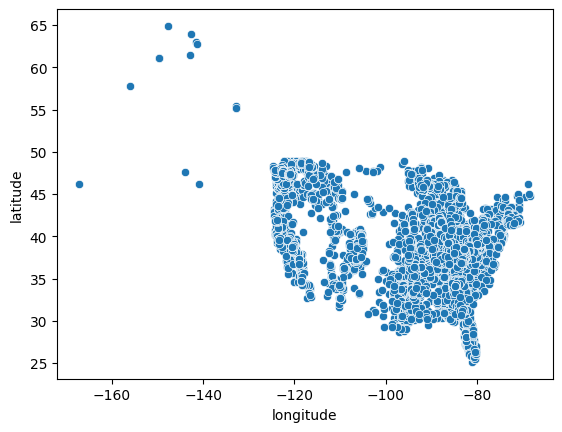

In [8]:
sns.scatterplot(x=coord_df['longitude'], y=coord_df['latitude'])

<Axes: xlabel='longitude', ylabel='latitude'>

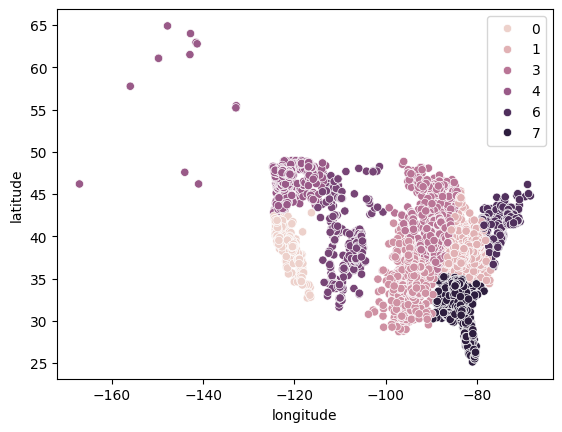

In [43]:
# Clustering to get rough US geographic regions
k_means = KMeans(n_clusters=8)
k_means.fit(coord_df)

# Alaska/Canada, PNW, California, Rocky Mountains, Midwest, South, Southeast, Appalachia, Northeast
sns.scatterplot(x=coord_df['longitude'], y=coord_df['latitude'], hue=k_means.labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

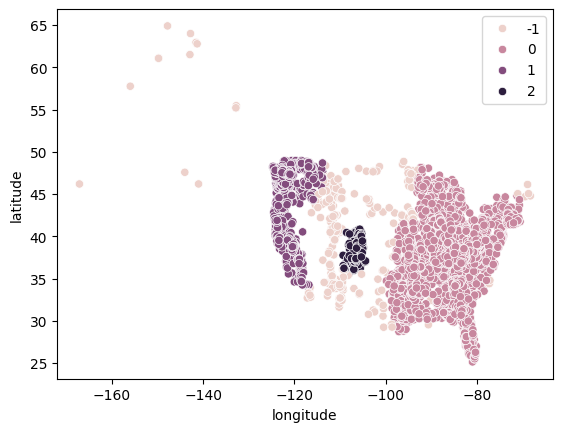

In [38]:
# Bit finicky with the parameters to get a good human clustering, KMeans will be used for the cluster labels

db_scan = DBSCAN(eps=2, min_samples=50)
db_scan.fit(coord_df)

sns.scatterplot(x=coord_df['longitude'], y=coord_df['latitude'], hue=db_scan.labels_)

In [46]:
df_with_clusters = df.assign(cluster=k_means.labels_)
df_with_clusters

,index,county,state,season,title,latitude,longitude,date,number,geohash,...,humidity,cloud_cover,precip_type,pressure,wind_bearing,wind_speed,Class A,Class B,Class C,cluster
0,2,Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45000,-71.50000,1974-09-20,6496.0,drm5ucxrc0,...,0.907111,0.268375,rain,1019.476257,263.869568,11.258579,1,0,0,6
1,5,Washita County,Oklahoma,Fall,Report 9765: Motorist and children have daylig...,35.30110,-99.17020,1973-09-28,9765.0,9y32z667yc,...,0.646660,0.113750,No Precipitation,953.307434,164.583038,14.922651,1,0,0,2
2,6,Washington County,Ohio,Summer,Report 4983: Sighting and vocalizations at a h...,39.38745,-81.67339,1971-08-01,4983.0,dpjbj6r280,...,0.745234,0.584542,No Precipitation,993.191711,17.920425,4.966946,1,0,0,1
3,7,Westchester County,New York,Fall,Report 31940: Fishermen and Law Enforcement Of...,41.29873,-73.73717,2010-09-01,31940.0,dr7dfn4nx3,...,0.578789,0.126625,No Precipitation,1001.331787,270.616058,6.397976,1,0,0,6
4,8,Washoe County,Nevada,Fall,Report 5692: Father and son hear vocalizations...,39.59200,-119.97500,1970-09-01,5692.0,9r49jzsb5g,...,0.402105,0.000000,No Precipitation,807.823975,219.053116,9.812248,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,5010,Harlan County,Kentucky,Fall,Report 25257: ATV riders find possible tracks ...,36.89771,-83.16293,2008-10-15,25257.0,dnscgt48er,...,0.740113,0.151125,No Precipitation,911.663757,201.991241,5.410581,0,1,0,1
4035,5011,Harlan County,Kentucky,Winter,Report 38980: Teen on four-wheeler has sightin...,36.83193,-83.42429,2013-01-10,38980.0,dns9t9h391,...,0.930158,0.878042,rain,980.778503,89.679916,6.219504,1,0,0,1
4036,5012,Anderson County,Kentucky,Fall,Report 1045: Father and son have a daylight en...,37.95708,-84.97527,2005-01-09,1045.0,dnexfmfuh8,...,0.793257,0.548708,No Precipitation,995.131042,178.840332,7.880466,1,0,0,1
4037,5013,Anderson County,Kentucky,Fall,Report 33187: Dual sighting in late afternoon ...,37.97699,-84.90234,2011-11-15,33187.0,dng8h18000,...,0.936365,0.963083,rain,984.935791,201.164108,13.016956,1,0,0,1


<Axes: xlabel='longitude', ylabel='latitude'>

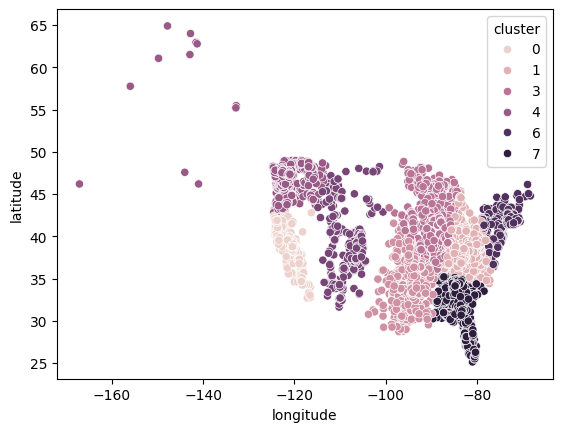

In [47]:
sns.scatterplot(x=df_with_clusters['longitude'], y=df_with_clusters['latitude'], hue=df_with_clusters['cluster'])

In [48]:
df_with_clusters.to_csv('./data/clean_data_clustered.csv')